In [1]:
# Setup Libraries
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.all import *

In [2]:
def get_dataset(balance=True):
    #Location of dataset in drive
    # /content/gdrive/MyDrive/CODEs/AZ/
    # /content/gdrive/MyDrive/Colab Notebooks/Alzheimer
    PATH = Path('/content/gdrive/MyDrive/CODEs/AZ/')
    trfm = [CropPad(170, 'zeros')]
    fnames = [ photo for folder in [PATH/'train', PATH/'test'] for classes in folder.ls() for photo in classes.ls()]
    if balance:
        dls = ImageDataLoaders.from_path_func(PATH, fnames, (lambda x: x.parent.name), seed=100, item_tfms=trfm)
    else:
        dls = ImageDataLoaders.from_folder(PATH, train='train', valid='test', seed=100, item_tfms=trfm)
    dls.show_batch()
    return dls

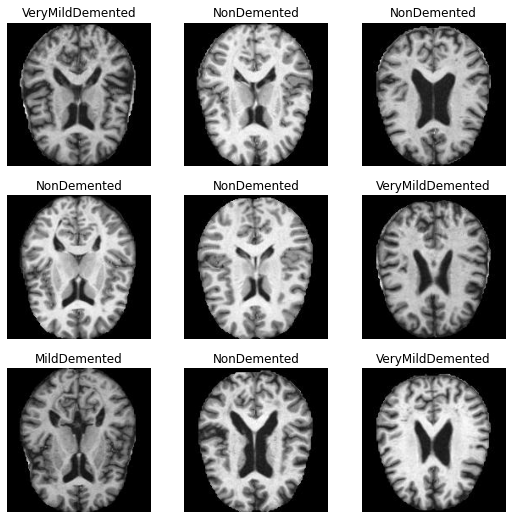

In [3]:
def train(dls, model_name):
    learner = cnn_learner(dls, model_name, metrics=error_rate)
    learner.fine_tune(10, freeze_epochs=4)
    learner.save(str(model_name))

    diag = ClassificationInterpretation.from_learner(learner)
    diag.print_classification_report()
    print("\n\n\n")
dls = get_dataset()

In [4]:
train(dls, models.resnet34)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,2.017973,1.240772,0.456250,03:17
1,1.545531,0.890143,0.332812,00:23
2,1.112441,0.700960,0.285156,00:23
3,0.843425,0.652463,0.269531,00:23


epoch,train_loss,valid_loss,error_rate,time
0,0.516673,0.403092,0.165625,00:30
1,0.313751,0.355575,0.148438,00:30
2,0.258570,0.412292,0.144531,00:30
3,0.165361,0.237090,0.075781,00:30
4,0.067472,0.135441,0.043750,00:30
5,0.043886,0.121598,0.041406,00:31
6,0.025725,0.129994,0.042188,00:31
7,0.012976,0.084626,0.027344,00:31
8,0.006926,0.068833,0.019531,00:31
9,0.003757,0.065153,0.019531,00:31


                  precision    recall  f1-score   support

    MildDemented       0.98      0.98      0.98       183
ModerateDemented       1.00      1.00      1.00        14
     NonDemented       0.99      0.98      0.99       636
VeryMildDemented       0.97      0.98      0.97       447

        accuracy                           0.98      1280
       macro avg       0.98      0.98      0.98      1280
    weighted avg       0.98      0.98      0.98      1280







In [5]:
resnet_models = [models.resnet18, models.resnet34, models.resnet50, models.resnet101, models.resnet152]
squeeze_models = [models.squeezenet1_0, models.squeezenet1_1]
desnse_models = [models.densenet121, models.densenet161, models.densenet169, models.densenet201]
vgg_models = [models.vgg16_bn, models.vgg19_bn]

In [ ]:
resnet_result = [ train(dls, model) for model in resnet_models ]

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.985301,1.242196,0.473437,00:22
1,1.544155,0.964082,0.383594,00:22
2,1.123522,0.728834,0.313281,00:22
3,0.850866,0.639757,0.260156,00:21


epoch,train_loss,valid_loss,error_rate,time
0,0.534528,0.395994,0.157813,00:22
1,0.310860,0.321074,0.124219,00:23
2,0.205487,0.285125,0.110156,00:22
3,0.140999,0.205070,0.078125,00:23
4,0.075944,0.162190,0.053125,00:22
5,0.044404,0.130387,0.041406,00:22
6,0.019120,0.082879,0.025781,00:23
7,0.007698,0.081460,0.026563,00:22
8,0.003599,0.072855,0.023438,00:22
9,0.002832,0.072760,0.024219,00:22


                  precision    recall  f1-score   support

    MildDemented       0.98      0.98      0.98       183
ModerateDemented       1.00      1.00      1.00        14
     NonDemented       0.98      0.98      0.98       636
VeryMildDemented       0.97      0.97      0.97       447

        accuracy                           0.98      1280
       macro avg       0.98      0.98      0.98      1280
    weighted avg       0.98      0.98      0.98      1280







epoch,train_loss,valid_loss,error_rate,time
0,1.901569,1.201536,0.439063,00:24
1,1.461127,0.900317,0.328125,00:24
2,1.088231,0.761599,0.295312,00:23
3,0.833327,0.669575,0.284375,00:23


epoch,train_loss,valid_loss,error_rate,time
0,0.539747,0.376745,0.133594,00:31
1,0.297290,0.350412,0.133594,00:31
2,0.252986,0.357493,0.133594,00:31
3,0.144590,0.199552,0.080469,00:31
4,0.090523,0.212513,0.071094,00:31
5,0.050116,0.116364,0.042969,00:31
6,0.021458,0.072298,0.023438,00:31
7,0.009731,0.069352,0.021094,00:31
8,0.003987,0.064324,0.020312,00:31
9,0.002808,0.065048,0.021875,00:31


                  precision    recall  f1-score   support

    MildDemented       0.99      0.97      0.98       183
ModerateDemented       1.00      1.00      1.00        14
     NonDemented       0.99      0.97      0.98       636
VeryMildDemented       0.95      0.98      0.97       447

        accuracy                           0.98      1280
       macro avg       0.98      0.98      0.98      1280
    weighted avg       0.98      0.98      0.98      1280







Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.785544,1.078933,0.375781,00:37
1,1.333717,0.863804,0.317969,00:37
2,0.944781,0.669969,0.267969,00:38
3,0.666833,0.561345,0.226562,00:38


epoch,train_loss,valid_loss,error_rate,time
0,0.397072,0.357673,0.143750,00:48
1,0.222274,0.507716,0.161719,00:48
2,0.267198,0.305078,0.107813,00:48
3,0.139956,0.208123,0.071875,00:48
4,0.083813,0.132180,0.042188,00:48
5,0.041581,0.113937,0.037500,00:48
6,0.017876,0.060928,0.021094,00:48
7,0.007036,0.050554,0.017969,00:48
8,0.003384,0.039291,0.014844,00:48


In [ ]:
squeeze_result = [ train(dls, model) for model in squeeze_models ]

In [ ]:
desnse_result = [ train(dls, model) for model in desnse_models ]

In [ ]:
vgg_result = [ train(dls, model) for model in vgg_models ]